<a href="https://colab.research.google.com/github/mugenen/notebook/blob/master/%E6%9D%B1%E4%BA%AC%E3%81%AE%E6%96%B0%E5%9E%8B%E3%82%B3%E3%83%AD%E3%83%8A%E3%82%A6%E3%82%A4%E3%83%AB%E3%82%B9%E6%84%9F%E6%9F%93%E8%80%85%E6%95%B0%E3%81%AE%E4%B8%8B%E4%B8%80%E6%A1%81%E3%81%AE%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021-07-30 の感染者数が3300人でキリがよかったので、キリがよい数字がどれぐらい出てるか気になった。
とりあえず下一桁の数字がそれぞれどんな回数でてるか見てみる

# import など

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 7.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=2ba99eff47bc2aa4c6879d0bde1a97474c6af03f6e031c89d7486a505e1dd049
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import pandas as pd
import collections
import scipy.stats
import matplotlib.pyplot as plt
import japanize_matplotlib

#東京の感染者の情報のCSVをダウンロード
https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000068/resource/c2d997db-1450-43fa-8037-ebb11ec28d4c

In [3]:
!wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

--2021-07-31 14:41:38--  https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
Resolving stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)... 138.68.61.186, 184.72.37.151, 2604:a880:2:d0::20b2:9001, ...
Connecting to stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)|138.68.61.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18488165 (18M) [text/csv]
Saving to: ‘130001_tokyo_covid19_patients.csv’

130001_tokyo_covid1 100%[===================>]  17.63M  58.5MB/s    in 0.3s    

2021-07-31 14:41:38 (58.5 MB/s) - ‘130001_tokyo_covid19_patients.csv’ saved [18488165/18488165]



# CSV を読んでカウント
2021-01-01以降のデータだけ使う

In [4]:
df = pd.read_csv('130001_tokyo_covid19_patients.csv')

In [5]:
daily_count = df.groupby('公表_年月日').size().loc['2021-01-01':]
daily_count

公表_年月日
2021-01-01     793
2021-01-02     829
2021-01-03     826
2021-01-04     905
2021-01-05    1315
              ... 
2021-07-27    2848
2021-07-28    3177
2021-07-29    3865
2021-07-30    3300
2021-07-31    4058
Length: 212, dtype: int64

# 下一桁ごとにカウント

In [6]:
count_sorted = daily_count.map(lambda x: x % 10).value_counts().sort_index()

# 下一桁ごとの分布を可視化

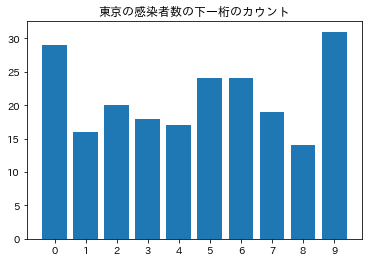

In [7]:
plt.figure(facecolor='white')
plt.bar(range(len(count_sorted)), count_sorted) # カウントが0のやつがあると10個に分かれなくておかしくなるけどそこは無視する
plt.xticks(range(len(count_sorted)))
plt.title('東京の感染者数の下一桁のカウント')
plt.show()

# カイ二乗検定をする
どの数字も同じ割合で出るものと考えて検定をしてみる

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [8]:
 scipy.stats.chisquare(count_sorted)

Power_divergenceResult(statistic=13.471698113207548, pvalue=0.14239790466589164)

p値が0.14なので帰無仮説は棄却されない(有意水準0.05だとして)